# $\color{#0080c0}{\text{Exploratory Data Analysis and preprocessing}}$
# $\color{#ff0080}{\text{Fitabase Data}}$

## $\color{#ff0080}{\text{Business task}}$

The objective is to analyze the Fitbit dataset, extracting valuable insights, uncovering patterns, and identifying trends. These findings will be utilized to offer detailed tracking analysis, personalized recommendations, and strategic decisions to capitalize on opportunities for improvement.

## $\color{#ff0080}{\text{Table of contents}}$

- [Data exploration](#1)
- [Processing Data](#2)
  - [Date and time processing](#2-1)
  - [Data integrity](#2-2)
- [Exploratory Data Analysis](#3)
  - [Outliers](#3-1)
  - [Correlation](#3-2)
- [Analysis](#4)

## $\color{#ff0080}{\text{Data exploration}}$ <a name="1"></a>

#### $\color{#ff702b}{\text{Importing libraries}}$

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
dailyActivity = pd.read_csv("Fitabase Data/dailyActivity_merged.csv")
hourlyCalories = pd.read_csv("Fitabase Data/hourlyCalories_merged.csv")
heartrate_seconds = pd.read_csv('Fitabase Data/heartrate_seconds_merged.csv')
hourlyIntensities = pd.read_csv("Fitabase Data/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data/hourlySteps_merged.csv")
sleepDay = pd.read_csv("Fitabase Data/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("Fitabase Data/weightLogInfo_merged.csv")

In [3]:
dailyActivity.sample(6)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
158,2022484408,4/16/2016,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177
568,5577150313,4/13/2016,5077,3.79,3.79,0.0,0.32,0.22,3.25,0.0,15,11,144,776,2551
474,4558609924,4/12/2016,5135,3.39,3.39,0.0,0.00,0.00,3.39,0.0,0,0,318,1122,1909
346,4020332650,4/12/2016,8539,6.12,6.12,0.0,0.15,0.24,5.68,0.0,4,15,331,712,3654
507,4702921684,4/14/2016,7860,6.37,6.37,0.0,0.00,0.00,6.37,0.0,0,0,271,772,2984
424,4388161847,4/24/2016,10243,7.88,7.88,0.0,1.08,0.51,6.30,0.0,14,8,239,584,2885


In [4]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
hourlyCalories.sample(6)

,Id,ActivityHour,Calories
17416,7086361926,4/15/2016 4:00:00 AM,68
4622,2026352035,4/22/2016 6:00:00 PM,63
1886,1644430081,4/30/2016 1:00:00 AM,84
17512,7086361926,4/19/2016 4:00:00 AM,68
22038,8877689391,5/10/2016 2:00:00 AM,73
2239,1844505072,4/15/2016 6:00:00 AM,56


In [6]:
hourlyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [7]:
heartrate_seconds.sample(6)

,Id,Time,Value
1377665,5577150313,4/18/2016 10:20:50 PM,60
724730,4388161847,4/28/2016 4:41:40 AM,50
1949629,6962181067,5/6/2016 6:55:55 PM,72
410400,4020332650,5/4/2016 3:07:29 AM,66
191436,2347167796,4/16/2016 7:54:10 AM,99
2059332,7007744171,4/22/2016 6:55:50 PM,73


In [8]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [9]:
hourlyIntensities.sample(6)

,Id,ActivityHour,TotalIntensity,AverageIntensity
9996,4388161847,4/24/2016 11:00:00 AM,5,0.083333
8017,3977333714,5/5/2016 8:00:00 AM,1,0.016667
17534,7086361926,4/20/2016 2:00:00 AM,0,0.000000
13777,5577150313,4/29/2016 5:00:00 AM,2,0.033333
21285,8792009665,5/6/2016 5:00:00 PM,0,0.000000
16098,6962181067,4/15/2016 7:00:00 PM,3,0.050000


In [10]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [11]:
hourlySteps.sample(6)

,Id,ActivityHour,StepTotal
17053,7007744171,4/25/2016 2:00:00 AM,0
18448,8053475328,4/27/2016 3:00:00 PM,0
1366,1624580081,5/9/2016 1:00:00 AM,0
4019,2022484408,4/28/2016 7:00:00 AM,368
1336,1624580081,5/7/2016 7:00:00 PM,173
15804,6775888955,4/28/2016 11:00:00 PM,0


In [12]:
hourlySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [13]:
sleepDay.sample(6)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
368,8378563200,4/14/2016 12:00:00 AM,1,424,455
165,4388161847,5/10/2016 12:00:00 AM,1,354,375
175,4445114986,4/21/2016 12:00:00 AM,1,436,469
315,6962181067,4/21/2016 12:00:00 AM,1,451,457
316,6962181067,4/22/2016 12:00:00 AM,1,425,435
13,1503960366,4/29/2016 12:00:00 AM,1,341,354


In [14]:
sleepDay.rename(columns={'SleepDay': 'SleepDate'}, inplace=True)

In [15]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDate           413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [16]:
weightLogInfo.sample(6)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
48,8877689391,4/19/2016 6:39:31 AM,85.300003,188.054316,NaN,25.530001,False,1461047971000
18,6962181067,4/17/2016 11:59:59 PM,61.400002,135.363832,NaN,23.959999,True,1460937599000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,NaN,27.459999,True,1461628799000
27,6962181067,4/27/2016 11:59:59 PM,61.200001,134.922906,NaN,23.889999,True,1461801599000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
58,8877689391,4/30/2016 7:49:03 AM,85.500000,188.495234,NaN,25.590000,False,1462002543000


In [17]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


## $\color{#ff0080}{\text{Processing Data}}$ <a name="2"></a>

In [71]:
weightLogInfo = weightLogInfo.drop(columns='Fat')
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 3.3+ KB


In [18]:
uniq = dailyActivity['Id'].nunique()
print("There are ", uniq, "unique users in dailyActivity dataset")
uniq = hourlyCalories['Id'].nunique()
print("There are ", uniq, "unique users in hourlyCalories dataset")
uniq = heartrate_seconds['Id'].nunique()
print("There are ", uniq, "unique users in heartrate_seconds dataset")
uniq = hourlyIntensities['Id'].nunique()
print("There are ", uniq, "unique users in hourlyIntensities dataset")
uniq = hourlySteps['Id'].nunique()
print("There are ", uniq, "unique users in hourlySteps dataset")
uniq = sleepDay['Id'].nunique()
print("There are ", uniq, "unique users in sleepDay dataset")
uniq = weightLogInfo['Id'].nunique()
print("There are ", uniq, "unique users in weightLogInfo dataset")

There are  33 unique users in dailyActivity dataset
There are  33 unique users in hourlyCalories dataset
There are  14 unique users in heartrate_seconds dataset
There are  33 unique users in hourlyIntensities dataset
There are  33 unique users in hourlySteps dataset
There are  24 unique users in sleepDay dataset
There are  8 unique users in weightLogInfo dataset


### $\color{#ff702b}{\text{Date and time processing}}$ <a name="2-1"></a>

In [19]:
dailyActivity['ActivityDate'].dtype

dtype('O')

In [20]:
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"])
print("Data type :", dailyActivity['ActivityDate'].dtype)

Data type : datetime64[ns]


In [21]:
print("Data type :", hourlyCalories["ActivityHour"].dtype)
print("Data type :", hourlyIntensities["ActivityHour"].dtype)
print("Data type :", hourlySteps["ActivityHour"].dtype)
print("Data type :", sleepDay["SleepDate"].dtype)

Data type : object
Data type : object
Data type : object
Data type : object


In [22]:
hourlyCalories["ActivityHour"] = pd.to_datetime(hourlyCalories["ActivityHour"])
hourlyIntensities["ActivityHour"] = pd.to_datetime(hourlyIntensities["ActivityHour"])
hourlySteps["ActivityHour"] = pd.to_datetime(hourlySteps["ActivityHour"])
sleepDay["SleepDate"] = pd.to_datetime(sleepDay["SleepDate"])

In [23]:
print("Data type :", hourlyCalories["ActivityHour"].dtype)
print("Data type :", hourlyIntensities["ActivityHour"].dtype)
print("Data type :", hourlySteps["ActivityHour"].dtype)
print("Data type :", sleepDay["SleepDate"].dtype)

Data type : datetime64[ns]
Data type : datetime64[ns]
Data type : datetime64[ns]
Data type : datetime64[ns]


In [24]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [25]:
dailyActivity['ActivityDay'] = dailyActivity['ActivityDate'].dt.strftime('%a')
dailyActivity['ActivityMonth'] = dailyActivity['ActivityDate'].dt.strftime('%b')

In [26]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,ActivityMonth
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tue,Apr
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wed,Apr
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thu,Apr
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Fri,Apr
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Sat,Apr


In [27]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [28]:
hourlyCalories['ActivityDate'] = hourlyCalories['ActivityHour'].dt.date
hourlyCalories['ActivityHour'] = hourlyCalories['ActivityHour'].dt.time
hourlyCalories.head()

,Id,ActivityHour,Calories,ActivityDate
0,1503960366,00:00:00,81,2016-04-12
1,1503960366,01:00:00,61,2016-04-12
2,1503960366,02:00:00,59,2016-04-12
3,1503960366,03:00:00,47,2016-04-12
4,1503960366,04:00:00,48,2016-04-12


In [29]:
hourlyIntensities.sample(4)

,Id,ActivityHour,TotalIntensity,AverageIntensity
19879,8378563200,2016-05-08 16:00:00,6,0.100000
16477,6962181067,2016-05-01 14:00:00,13,0.216667
7339,3372868164,2016-04-26 18:00:00,10,0.166667
492,1503960366,2016-05-02 12:00:00,64,1.066667


In [30]:
hourlyIntensities['ActivityDate'] = hourlyIntensities['ActivityHour'].dt.date
hourlyIntensities['ActivityHour'] = hourlyIntensities['ActivityHour'].dt.time
hourlyIntensities.sample(4)

,Id,ActivityHour,TotalIntensity,AverageIntensity,ActivityDate
11786,4558609924,19:00:00,22,0.366667,2016-05-07
11211,4558609924,20:00:00,0,0.000000,2016-04-13
11474,4558609924,19:00:00,18,0.300000,2016-04-24
348,1503960366,12:00:00,10,0.166667,2016-04-26


In [31]:
hourlySteps.sample(4)

,Id,ActivityHour,StepTotal
6251,2873212765,2016-04-12 02:00:00,0
93,1503960366,2016-04-15 21:00:00,280
13433,5577150313,2016-04-14 21:00:00,100
18934,8253242879,2016-04-17 06:00:00,0


In [32]:
hourlySteps['ActivityDate'] = hourlySteps['ActivityHour'].dt.date
hourlySteps['ActivityDay'] = hourlySteps['ActivityHour'].dt.strftime('%a')
hourlySteps['ActivityHour'] = hourlySteps['ActivityHour'].dt.time
hourlySteps.sample(4)

,Id,ActivityHour,StepTotal,ActivityDate,ActivityDay
15324,6290855005,16:00:00,604,2016-05-06,Fri
505,1503960366,01:00:00,79,2016-05-03,Tue
21553,8877689391,21:00:00,474,2016-04-19,Tue
10675,4445114986,03:00:00,8,2016-04-22,Fri


In [33]:
sleepDay.sample(6)

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
288,6117666160,2016-04-19,1,465,492
190,4445114986,2016-05-08,1,361,391
23,1503960366,2016-05-10,1,383,403
47,2026352035,2016-04-23,1,522,554
75,2347167796,2016-04-24,1,442,459
165,4388161847,2016-05-10,1,354,375


In [34]:
sleepDay['SleepDay'] = sleepDay['SleepDate'].dt.strftime('%a')
sleepDay['SleepDay'] = sleepDay['SleepDate'].dt.strftime('%b')
sleepDay.sample(4)

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay
133,4319703577,2016-05-01,1,484,500,May
82,3977333714,2016-04-13,2,295,456,Apr
155,4388161847,2016-04-28,1,428,458,Apr
120,4319703577,2016-04-18,1,515,551,Apr


### $\color{#ff702b}{\text{Data integrity}}$ <a name="2-2"></a>

In [35]:
dup = dailyActivity[dailyActivity.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in dataset.")

There are  0  duplicated rows in dataset.


In [36]:
dup = hourlyCalories[hourlyCalories.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlyCalories dataset.")
dup = hourlyIntensities[hourlyIntensities.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlyIntensities dataset.")
dup = hourlySteps[hourlySteps.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlySteps dataset.")
dup = sleepDay[sleepDay.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in sleepDay dataset.")
dup = heartrate_seconds[heartrate_seconds.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in heartrate_seconds dataset.")
dup = weightLogInfo[weightLogInfo.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in weightLogInfo dataset.")

There are  0  duplicated rows in hourlyCalories dataset.
There are  0  duplicated rows in hourlyIntensities dataset.
There are  0  duplicated rows in hourlySteps dataset.
There are  3  duplicated rows in sleepDay dataset.
There are  0  duplicated rows in heartrate_seconds dataset.
There are  0  duplicated rows in weightLogInfo dataset.


In [37]:
sleepDay.drop_duplicates(inplace=True)
print("There are ", dup, " duplicated rows in sleepDay dataset.")

There are  0  duplicated rows in sleepDay dataset.


## $\color{#ff0080}{\text{Exploratory Data Analysis}}$ <a name="3"></a>

### $\color{#ff702b}{\text{Outliers}}$ <a name="3-1"></a>

Text(0.5, 0.9, 'Outliers')

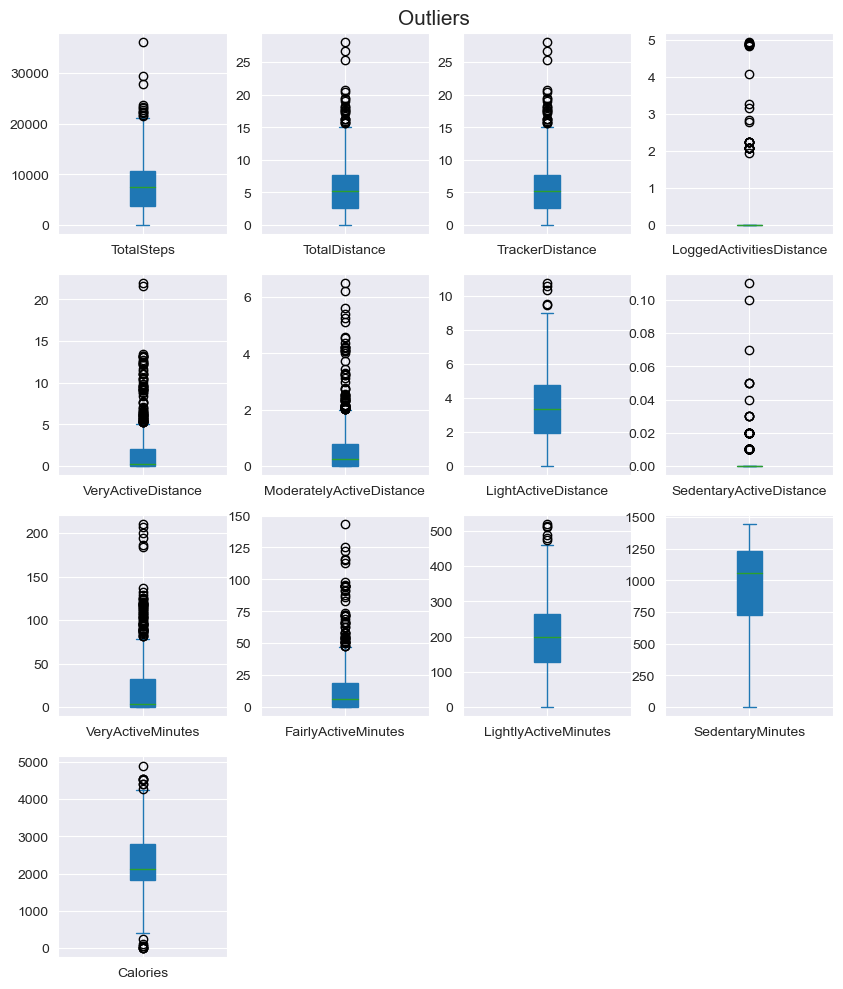

In [49]:
ploting_data = dailyActivity.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

In [39]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDate           410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
 5   SleepDay            410 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 22.4+ KB


Text(0.5, 0.9, 'Outliers')

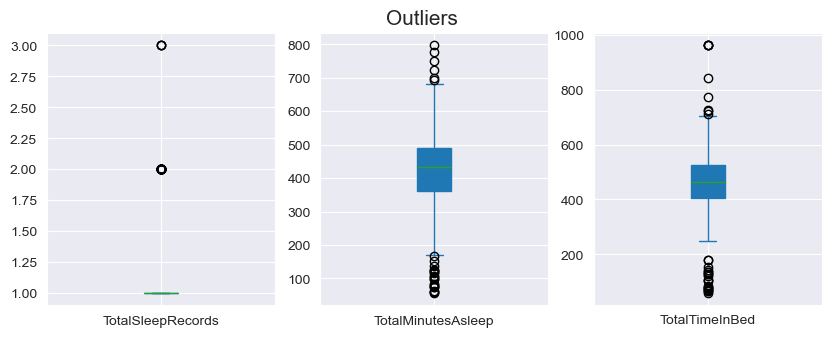

In [52]:
ploting_data = sleepDay.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(3,3), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

In [53]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


Text(0.5, 0.9, 'Outliers')

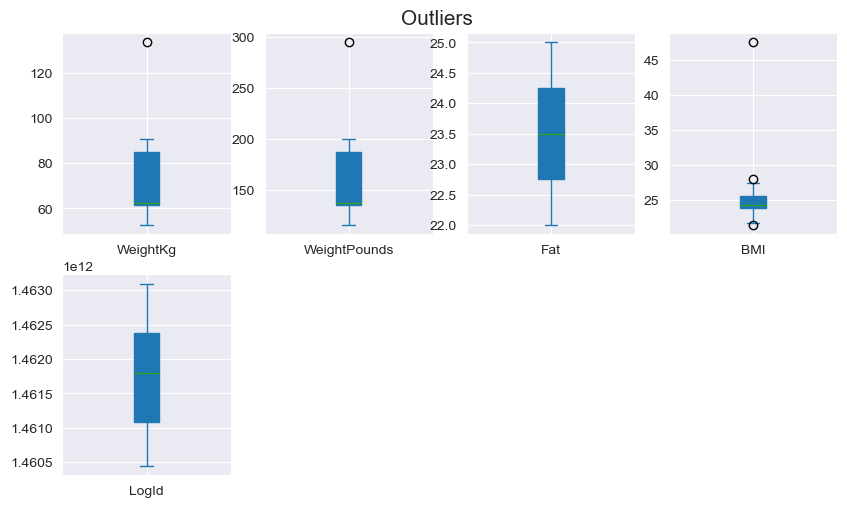

In [63]:
ploting_data = weightLogInfo.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

### $\color{#ff702b}{\text{Correlation}}$ <a name="3-2"></a>

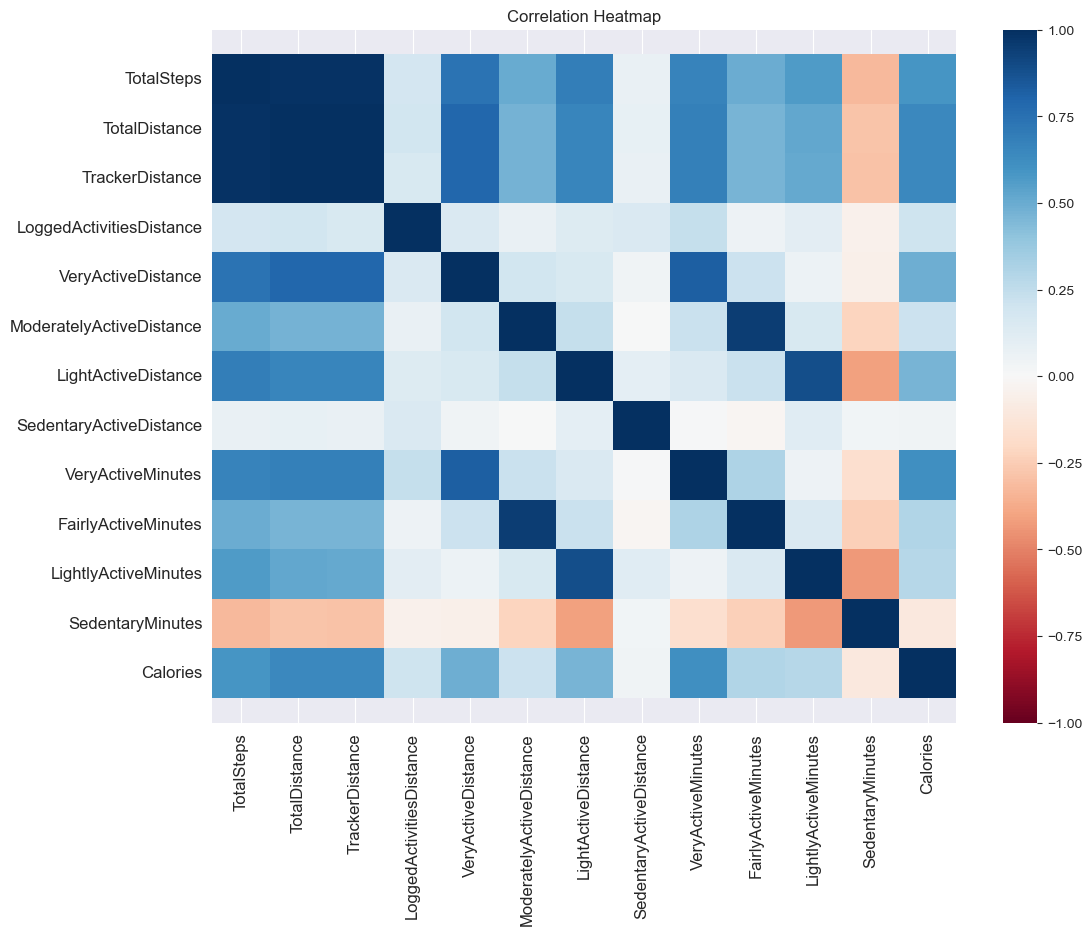

In [64]:
ploting_data = dailyActivity.drop(columns=['Id', 'ActivityDate', 'ActivityDay', 'ActivityMonth'])

plt.figure(figsize = (12, 9))
s = sns.heatmap(ploting_data.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

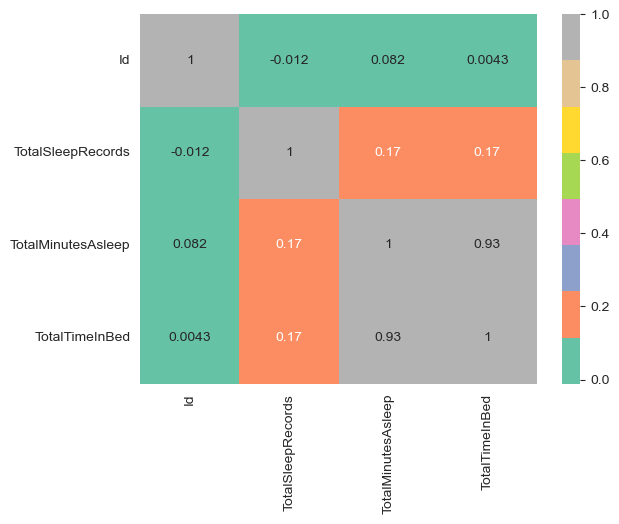

In [65]:
sns.heatmap(sleepDay.corr(numeric_only=True),annot=True,cmap='Set2')

<Axes: >

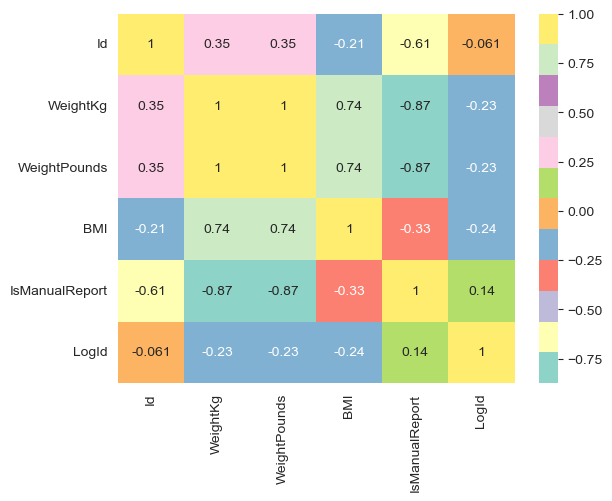

In [72]:
sns.heatmap(weightLogInfo.corr(numeric_only=True),annot=True,cmap='Set3')

## $\color{#ff0080}{\text{Analysis}}$ <a name="4"></a>

Text(0.5, 1.0, 'Total Steps vs Calories')

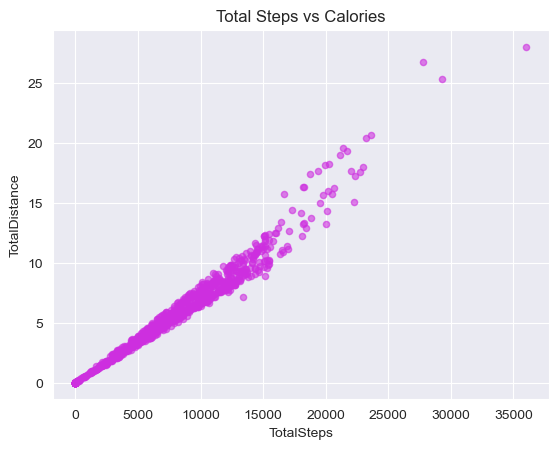

In [44]:
dailyActivity.plot.scatter(x='TotalSteps',y='TotalDistance', alpha =0.6, c ='#cd2fdf')
plt.title('Total Steps vs Calories')

Text(0.5, 1.0, 'Total Distance vs Calories')

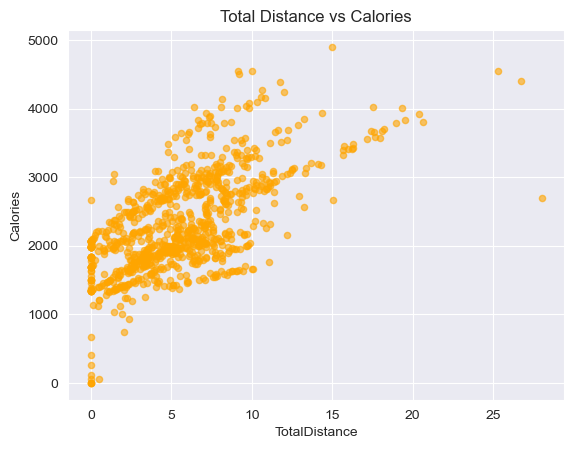

In [45]:
dailyActivity.plot.scatter(x='TotalDistance',y='Calories', alpha =0.6, color='orange')
plt.title('Total Distance vs Calories')

Text(0.5, 1.0, 'Total Steps vs Calories')

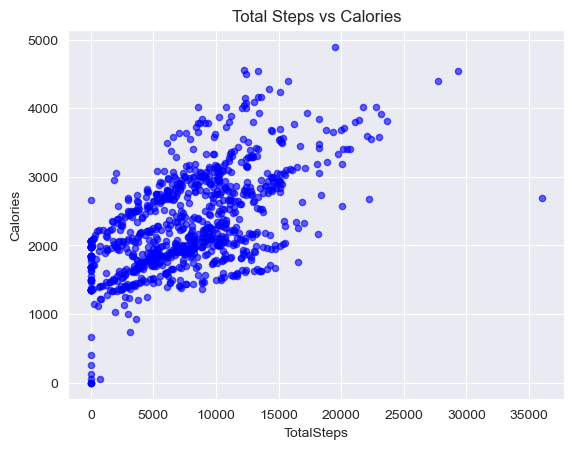

In [46]:
dailyActivity.plot.scatter(x='TotalSteps',y='Calories', alpha =0.6, color='blue')
plt.title('Total Steps vs Calories')

Text(0.5, 1.0, 'Total Steps Taken By Weekday')

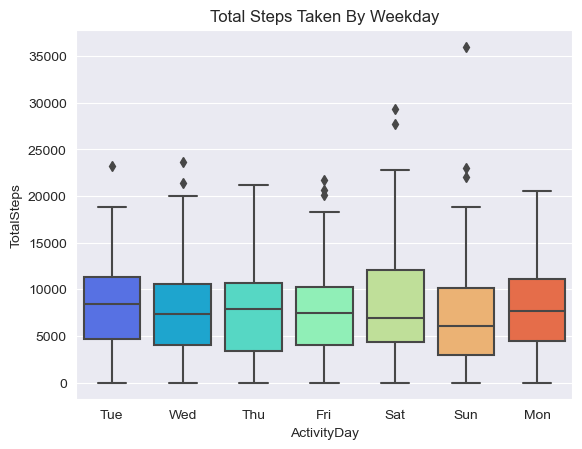

In [47]:
sns.boxplot(x='ActivityDay',y='TotalSteps',data=dailyActivity,palette='rainbow')
plt.title('Total Steps Taken By Weekday')

Text(0.5, 1.0, 'Total Calories burnt by Weekday')

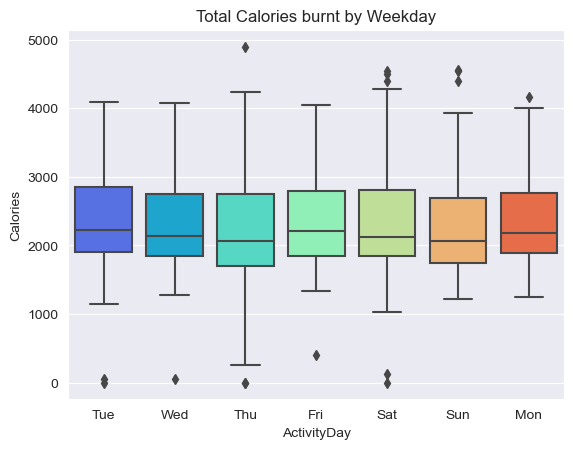

In [48]:
sns.boxplot(x='ActivityDay',y='Calories',data=dailyActivity,palette='rainbow')
plt.title('Total Calories burnt by Weekday')

In [49]:
# Calculate the average steps per user
averageSteps = dailyActivity.groupby('Id')['TotalSteps'].mean()
print(averageSteps.isnull().sum())
print(len(averageSteps))

averageSteps_data = averageSteps.reset_index()
averageSteps_data.columns = ['Id', 'AverageSteps']
averageSteps_data.head(6)

0
33


,Id,AverageSteps
0,1503960366,12116.741935
1,1624580081,5743.903226
2,1644430081,7282.966667
3,1844505072,2580.064516
4,1927972279,916.129032
5,2022484408,11370.645161


In [50]:
# Define a function to classify users based on average steps
def classifyUsers(avg_steps):
    if avg_steps < 2500:
        return 'Sedentary'
    elif avg_steps >= 2500 and avg_steps < 5000:
        return 'Lightly Active'
    elif avg_steps >= 5000 and avg_steps < 7500:
        return 'Active Users'
    elif avg_steps >= 7500 and avg_steps < 10000:
        return 'Fairly Active'
    else:
        return 'Super Active'

averageSteps_data['UserClassification'] = averageSteps_data['AverageSteps'].apply(classifyUsers)
averageSteps_data.head(6)

,Id,AverageSteps,UserClassification
0,1503960366,12116.741935,Super Active
1,1624580081,5743.903226,Active Users
2,1644430081,7282.966667,Active Users
3,1844505072,2580.064516,Lightly Active
4,1927972279,916.129032,Sedentary
5,2022484408,11370.645161,Super Active


Active Users      9
Fairly Active     9
Super Active      7
Lightly Active    5
Sedentary         3
Name: UserClassification, dtype: int64


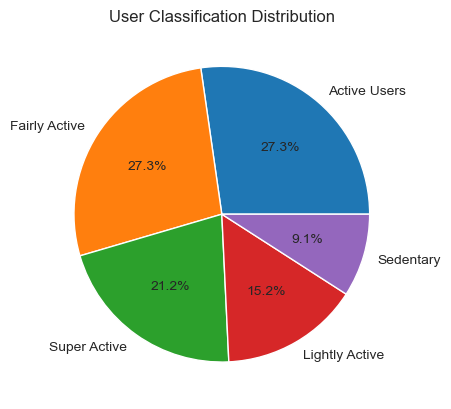

In [51]:
classification_counts = averageSteps_data['UserClassification'].value_counts()
print(classification_counts)

plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%')
plt.title('User Classification Distribution')
plt.show()

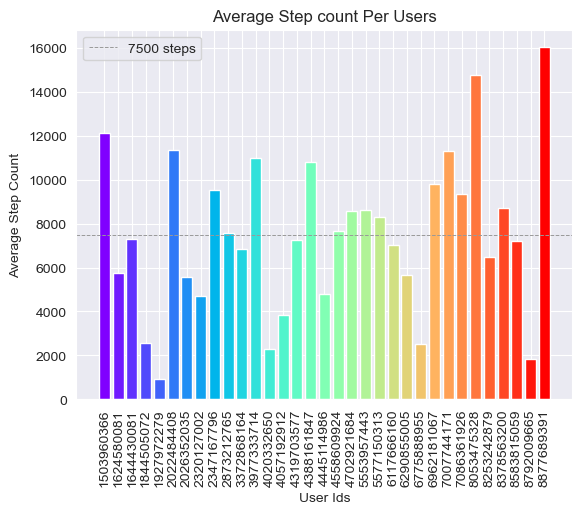

In [52]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(averageSteps)))

plt.bar(range(len(averageSteps)), averageSteps.values, color=colors)
plt.xlabel('User Ids')
plt.ylabel('Average Step Count')
plt.title('Average Step count Per Users')

plt.xticks(range(len(averageSteps)), averageSteps.index, rotation=90)

plt.axhline(y=7500, color='#999999', linestyle='--',linewidth=0.70, label='7500 steps')
plt.legend()

plt.show()

In [59]:
specific_user_id =6962181067

# Defining the start and end dates of the time period we want to filter
start_date = pd.to_datetime('2016-04-12')
end_date = pd.to_datetime('2016-04-18')

#sub_df = dailyActivitySleepMerged[dailyActivitySleepMerged['Id'] == specific_user_id]

#sub_df = dailyActivitySleepMerged[(dailyActivitySleepMerged['ActivityDate'] >= start_date) & (dailyActivitySleepMerged['ActivityDate'] <= end_date)]

sub_df = dailyActivity[(dailyActivity['ActivityDate'] >= start_date) & (dailyActivity['ActivityDate'] <= end_date)
                                  & (dailyActivity['Id'] == specific_user_id)]
print(len(sub_df))
sub_df

7


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,ActivityMonth
680,6962181067,2016-04-12,10199,6.74,6.74,0.0,3.40,0.83,2.51,0.0,50,14,189,796,1994,Tue,Apr
681,6962181067,2016-04-13,5652,3.74,3.74,0.0,0.57,1.21,1.96,0.0,8,24,142,548,1718,Wed,Apr
682,6962181067,2016-04-14,1551,1.03,1.03,0.0,0.00,0.00,1.03,0.0,0,0,86,862,1466,Thu,Apr
683,6962181067,2016-04-15,5563,3.68,3.68,0.0,0.00,0.00,3.68,0.0,0,0,217,837,1756,Fri,Apr
684,6962181067,2016-04-16,13217,8.74,8.74,0.0,3.66,0.19,4.88,0.0,50,3,280,741,2173,Sat,Apr
685,6962181067,2016-04-17,10145,6.71,6.71,0.0,0.33,0.68,5.69,0.0,5,13,295,634,2027,Sun,Apr
686,6962181067,2016-04-18,11404,7.54,7.54,0.0,0.83,2.39,4.32,0.0,13,42,238,689,2039,Mon,Apr


In [60]:
groupedActivity = sub_df.groupby('ActivityDay')['TotalSteps'].sum()
groupedActivity

ActivityDay
Fri     5563
Mon    11404
Sat    13217
Sun    10145
Thu     1551
Tue    10199
Wed     5652
Name: TotalSteps, dtype: int64

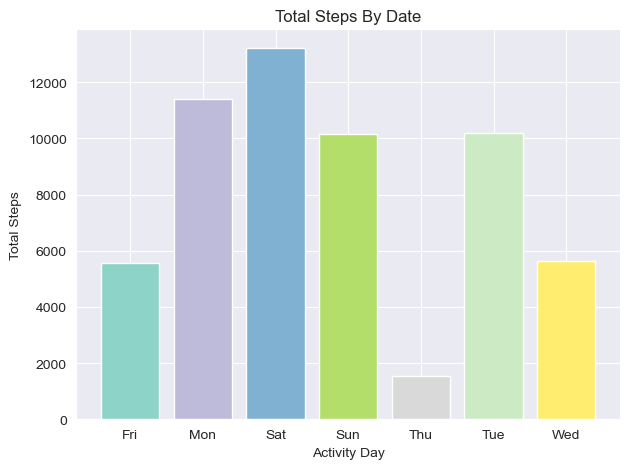

In [61]:
num_colors = len(groupedActivity)
cmap = plt.get_cmap('Set3')
colors = cmap(np.linspace(0, 1, num_colors))

fig, axs = plt.subplots()

axs.bar(groupedActivity.index, groupedActivity.values, color=colors)
axs.set_xlabel('Activity Day')
axs.set_ylabel('Total Steps')
axs.set_title('Total Steps By Date')

# Adjusting spacing between subplots
plt.tight_layout()

plt.show()

In [63]:
groupedhourlySteps = hourlySteps.groupby('ActivityHour')['StepTotal'].mean()
groupedhourlySteps.sample(6)

ActivityHour
16:00:00    496.845645
14:00:00    540.513572
17:00:00    550.232892
07:00:00    306.049409
23:00:00    122.132890
10:00:00    481.665231
Name: StepTotal, dtype: float64

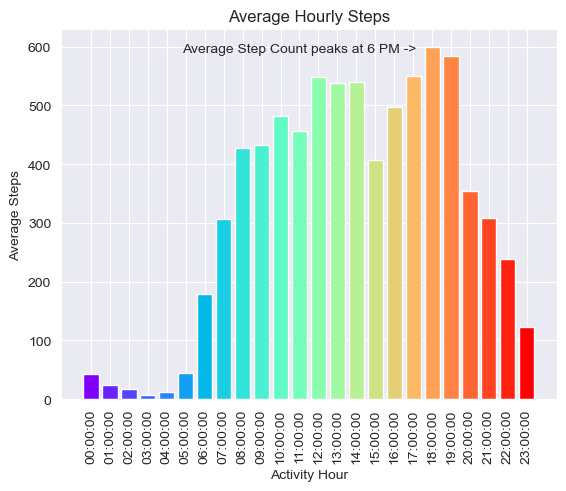

In [64]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(groupedhourlySteps)))

plt.bar(range(len(groupedhourlySteps)), groupedhourlySteps.values, color=colors)
plt.xlabel('Activity Hour')
plt.ylabel('Average Steps')
plt.title('Average Hourly Steps')

plt.xticks(range(len(groupedhourlySteps)), groupedhourlySteps.index, rotation=90)
plt.text(11, 590, 'Average Step Count peaks at 6 PM ->', ha='center')
plt.show()